In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

# QQ图

1.获取原始N个数据的概率值(此处定义N=100)

In [3]:
N=100
q=np.linspace(0.5/N,1-0.5/N,N)
q

array([0.005, 0.015, 0.025, 0.035, 0.045, 0.055, 0.065, 0.075, 0.085,
       0.095, 0.105, 0.115, 0.125, 0.135, 0.145, 0.155, 0.165, 0.175,
       0.185, 0.195, 0.205, 0.215, 0.225, 0.235, 0.245, 0.255, 0.265,
       0.275, 0.285, 0.295, 0.305, 0.315, 0.325, 0.335, 0.345, 0.355,
       0.365, 0.375, 0.385, 0.395, 0.405, 0.415, 0.425, 0.435, 0.445,
       0.455, 0.465, 0.475, 0.485, 0.495, 0.505, 0.515, 0.525, 0.535,
       0.545, 0.555, 0.565, 0.575, 0.585, 0.595, 0.605, 0.615, 0.625,
       0.635, 0.645, 0.655, 0.665, 0.675, 0.685, 0.695, 0.705, 0.715,
       0.725, 0.735, 0.745, 0.755, 0.765, 0.775, 0.785, 0.795, 0.805,
       0.815, 0.825, 0.835, 0.845, 0.855, 0.865, 0.875, 0.885, 0.895,
       0.905, 0.915, 0.925, 0.935, 0.945, 0.955, 0.965, 0.975, 0.985,
       0.995])

2.计算标准分位数

In [4]:
ppf=stats.norm.ppf(q,0,1)
ppf

array([-2.5758293 , -2.17009038, -1.95996398, -1.81191067, -1.69539771,
       -1.59819314, -1.51410189, -1.43953147, -1.37220381, -1.31057911,
       -1.25356544, -1.20035886, -1.15034938, -1.10306256, -1.05812162,
       -1.01522203, -0.97411388, -0.93458929, -0.89647336, -0.85961736,
       -0.82389363, -0.78919165, -0.75541503, -0.72247905, -0.69030882,
       -0.65883769, -0.62800601, -0.59776013, -0.5680515 , -0.53883603,
       -0.51007346, -0.48172685, -0.45376219, -0.42614801, -0.39885507,
       -0.37185609, -0.34512553, -0.31863936, -0.2923749 , -0.26631061,
       -0.24042603, -0.21470157, -0.18911843, -0.16365849, -0.13830421,
       -0.11303854, -0.08784484, -0.06270678, -0.03760829, -0.01253347,
        0.01253347,  0.03760829,  0.06270678,  0.08784484,  0.11303854,
        0.13830421,  0.16365849,  0.18911843,  0.21470157,  0.24042603,
        0.26631061,  0.2923749 ,  0.31863936,  0.34512553,  0.37185609,
        0.39885507,  0.42614801,  0.45376219,  0.48172685,  0.51

3.画图

Text(0, 0.5, 'Sample Quantiles')

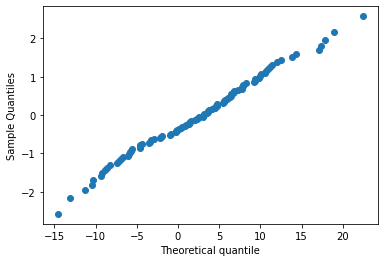

In [17]:
x=np.random.normal(1,8.25,N)#取一个来自期望为1标准差为8.25的正态分布的样本数据
x=np.sort(x)#对读取的数据进行排序
plt.scatter(x,ppf)
plt.xlabel('Theoretical quantile')
plt.ylabel('Sample Quantiles')

可以看到正态分布的样本qq图基本呈现直线性

Text(0, 0.5, 'Sample Quantiles')

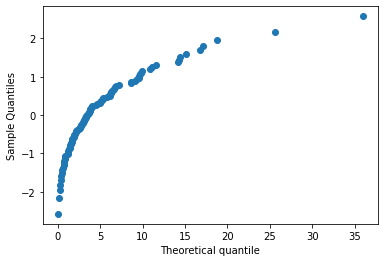

In [6]:
x=np.random.exponential(5,100)#取一个来自指数分布的样本数据
x=np.sort(x)#对读取的数据进行排序
plt.scatter(x,ppf)
plt.xlabel('Theoretical quantile')
plt.ylabel('Sample Quantiles')

可以看到来自指数分布的样本向上凸

不呈现直线性






# 成年女性出汗量及其体内钠和钾含量数据的参数假设检验

1.导入数据

In [7]:
data = pd.DataFrame({
    'x1': [3.7,3.8,3.1,2.4,6.7,3.9,3.5,1.5,4.5,4.1,5.7,3.2,4.6,7.2,5.4,4.5,4.5,8.5,6.5,5.5],
    'x2': [48.5,47.2,55.5,24.8,47.4,36.9,27.8,13.5,71.6,44.1,65.1,53.2,36.1,33.1,54.1,58.8,40.2,56.4,52.8,40.9],
    'x3': [9.3,10.9,9.7,14.0,8.5,12.7,9.8,10.1,8.2,11.2,8.0,12.0,7.9,7.6,11.3,12.3,8.4,7.1,10.9,9.4]})
data

,x1,x2,x3
0,3.7,48.5,9.3
1,3.8,47.2,10.9
2,3.1,55.5,9.7
3,2.4,24.8,14.0
4,6.7,47.4,8.5
5,3.9,36.9,12.7
6,3.5,27.8,9.8
7,1.5,13.5,10.1
8,4.5,71.6,8.2
9,4.1,44.1,11.2


ps：这个数据x1和书本中例题数据和解答过程中答案对不起来，我改了一下数据把第10行的4.7改成了5.7

2.参数设置

In [8]:
mu=np.array([4,50,10])
n=20
p=3
x=np.transpose(data)

In [9]:
s_mean=np.transpose(np.mean(data))
s_mean#样本均值

x1     4.640
x2    45.400
x3     9.965
dtype: float64

3.求样本的协方差和协方差的逆

In [10]:
cov=np.cov(x)
cov_inv=np.linalg.inv(cov)
print(cov)
print(cov_inv)

[[  2.87936842  10.01        -1.80905263]
 [ 10.01       199.78842105  -5.64      ]
 [ -1.80905263  -5.64         3.62765789]]
[[ 0.58615531 -0.02208572  0.25796874]
 [-0.02208572  0.00606723 -0.00158093]
 [ 0.25796874 -0.00158093  0.40184677]]


4.计算T^2

In [11]:
T=np.matmul(np.matmul(n*(np.transpose(s_mean-mu)),cov_inv),(s_mean-mu))

5.转化计算F分布

In [12]:
F=(n-p)/((n-1)*p)*T
F

2.9045462902176604

5.计算临界值

In [13]:
alpha=0.05
stats.f.ppf(1-alpha,p,n-p)

3.1967768409433432

F=2.9045<3.2,所以H0相容

In [14]:
stats.f.sf(F,p,n-p)

0.06492833538052906

计算得到p值为0.6493>0.05所以H0相容